In [3]:
#library import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [4]:
#data import
%cd /Users/pg/OneDrive/Duke Assigment/Job Seeking/Collection_DS_takehome_challenges/data
data=pd.read_csv('conversion_data.csv')

/Users/pg/OneDrive/Duke Assigment/Job Seeking/Collection_DS_takehome_challenges/data


In [5]:
#machine learning library import
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression #cross validation need more learning
from sklearn.model_selection import train_test_split
#from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix


In [6]:
data.head()

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0


In [7]:
#load and inspect data
    #handle outliers
    #inspect country's distribution and its relationship with conversion (exploratary analysis)
    #Machine Learning
    #result

# Inspect Data

In [8]:
data.head()

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0


In [9]:
#data.converted=data['converted'].astype('category')

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316200 entries, 0 to 316199
Data columns (total 6 columns):
country                316200 non-null object
age                    316200 non-null int64
new_user               316200 non-null int64
source                 316200 non-null object
total_pages_visited    316200 non-null int64
converted              316200 non-null int64
dtypes: int64(4), object(2)
memory usage: 14.5+ MB


In [11]:
data.describe()
#chenk the data to see if it makes sense
#the max age is 123, and it shouldn't be

,age,new_user,total_pages_visited,converted
count,316200.000000,316200.000000,316200.000000,316200.000000
mean,30.569858,0.685465,4.872966,0.032258
std,8.271802,0.464331,3.341104,0.176685
min,17.000000,0.000000,1.000000,0.000000
25%,24.000000,0.000000,2.000000,0.000000
50%,30.000000,1.000000,4.000000,0.000000
75%,36.000000,1.000000,7.000000,0.000000
max,123.000000,1.000000,29.000000,1.000000


#deal with teh age outlier

In [12]:
data=data[data.age <=100]

In [13]:
data.describe()

,age,new_user,total_pages_visited,converted
count,316198.000000,316198.000000,316198.000000,316198.000000
mean,30.569311,0.685469,4.872918,0.032252
std,8.268958,0.464329,3.341053,0.176669
min,17.000000,0.000000,1.000000,0.000000
25%,24.000000,0.000000,2.000000,0.000000
50%,30.000000,1.000000,4.000000,0.000000
75%,36.000000,1.000000,7.000000,0.000000
max,79.000000,1.000000,29.000000,1.000000


# Exploratory Data Analysis

In [14]:
#one possible way to do it is to explore the relationship between the y variables and each x varianles

In [15]:
#Explore Countries

In [16]:
select=['country', 'converted']
grouped=data[select].groupby('country').mean().reset_index()#.reset_index free the country from index

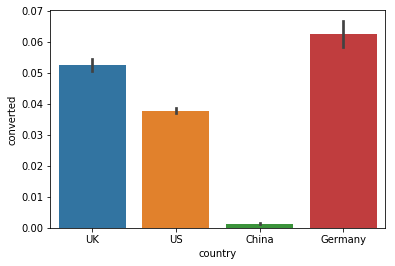

In [17]:
sns.barplot(x='country', y='converted', data=data)

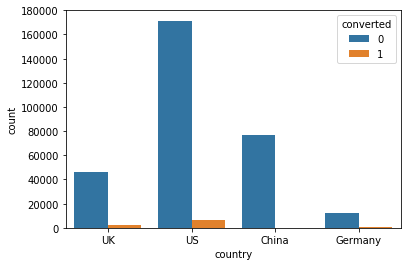

In [18]:
sns.countplot(x='country', hue='converted', data=data)

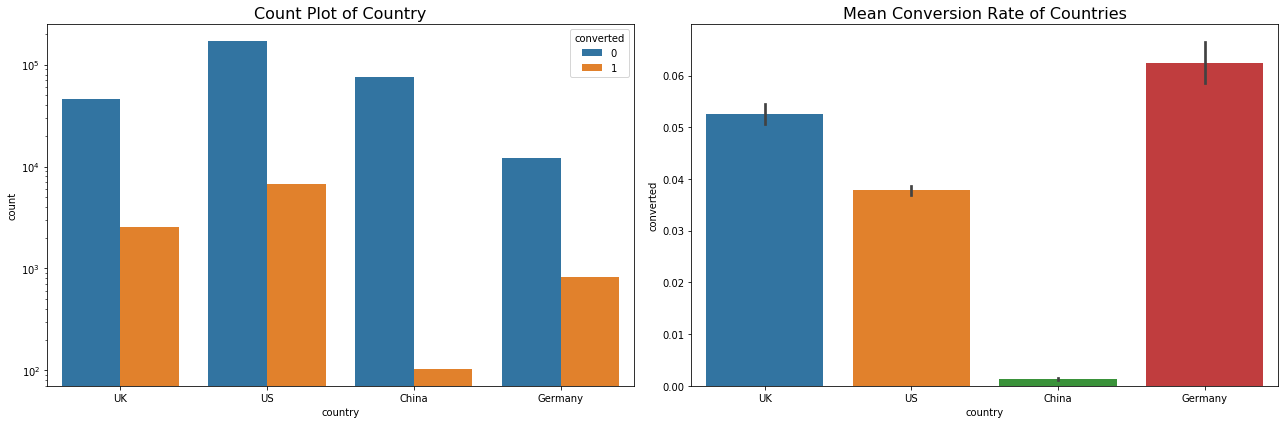

In [19]:
# let's try to combine the two graph in one line?
fig, ax=plt.subplots(nrows=1, ncols=2, figsize=(18, 6)) #set the picture frames
sns.countplot(x='country', hue='converted', data=data, ax=ax[0])
ax[0].set_title('Count Plot of Country', fontsize=16)
ax[0].set_yscale('log')# be careful here because the scaled y-axis can be misleading
sns.barplot(x='country', y='converted', data=data, ax=ax[1])
ax[1].set_title('Mean Conversion Rate of Countries', fontsize=16)
#ax[1].set_yscale('log')
plt.tight_layout()# avoid overlap
plt.show()

**We can draw conclusion from the plots that China has the lowest conversion rate.**

**Carefully think about how to deal with that**

In [20]:
#Visualization of different sources

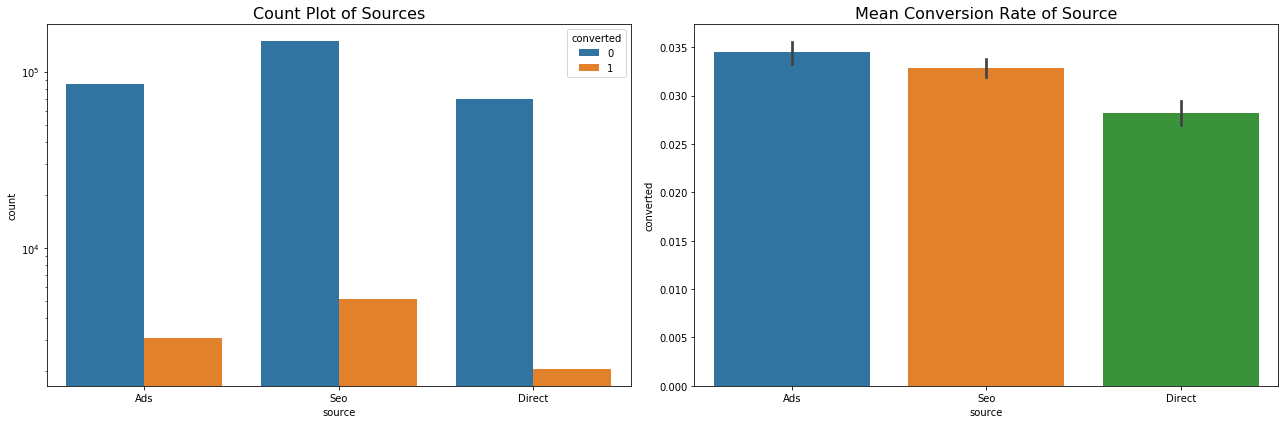

In [21]:
fig, ax=plt.subplots(nrows=1, ncols=2, figsize=(18, 6)) #set the picture frames
sns.countplot(x='source', hue='converted', data=data, ax=ax[0])
ax[0].set_title('Count Plot of Sources', fontsize=16)
ax[0].set_yscale('log')# be careful here because the scaled y-axis can be misleading
sns.barplot(x='source', y='converted', data=data, ax=ax[1])
ax[1].set_title('Mean Conversion Rate of Source', fontsize=16)
#ax[1].set_yscale('log')
plt.tight_layout()# avoid overlap
plt.show()

**A little bit hard to draw conclusion from the picture actually.**

**It seems the direct resource needs more attention**

In [22]:
#Visualization of ages
#for the this variable the distribution should be a better plot

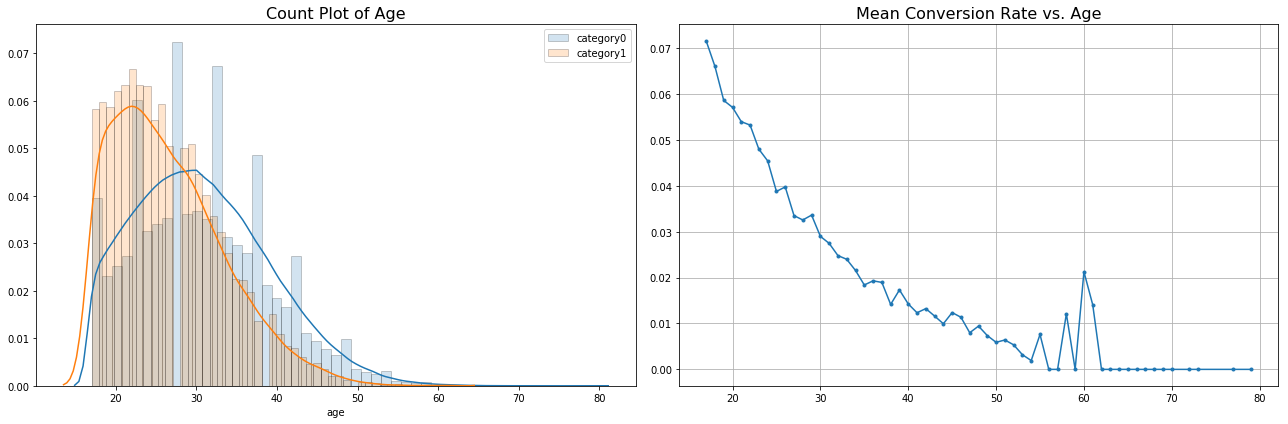

In [23]:
#maybe see the distribution seperateky
fig, ax=plt.subplots(nrows=1, ncols=2, figsize=(18, 6)) #set the picture frames
hist_kws={'histtype': 'bar'#barplot
          , 'edgecolor':'black'#the color of outframe
          , 'alpha': 0.2}
sns.distplot(data[data.converted==0].age, hist_kws=hist_kws,ax=ax[0], label='category0')
sns.distplot(data[data.converted==1].age, hist_kws=hist_kws,ax=ax[0], label='category1')
ax[0].set_title('Count Plot of Age', fontsize=16)
ax[0].legend()#show the legend according to label
grouped=data[['age', 'converted']].groupby('age').mean().reset_index()
ax[1].plot(grouped['age'], grouped['converted'], '.-')
ax[1].set_title('Mean Conversion Rate vs. Age', fontsize=16)
ax[1].grid(True)#set the lines within the picture
plt.tight_layout()# avoid overlap
plt.show()

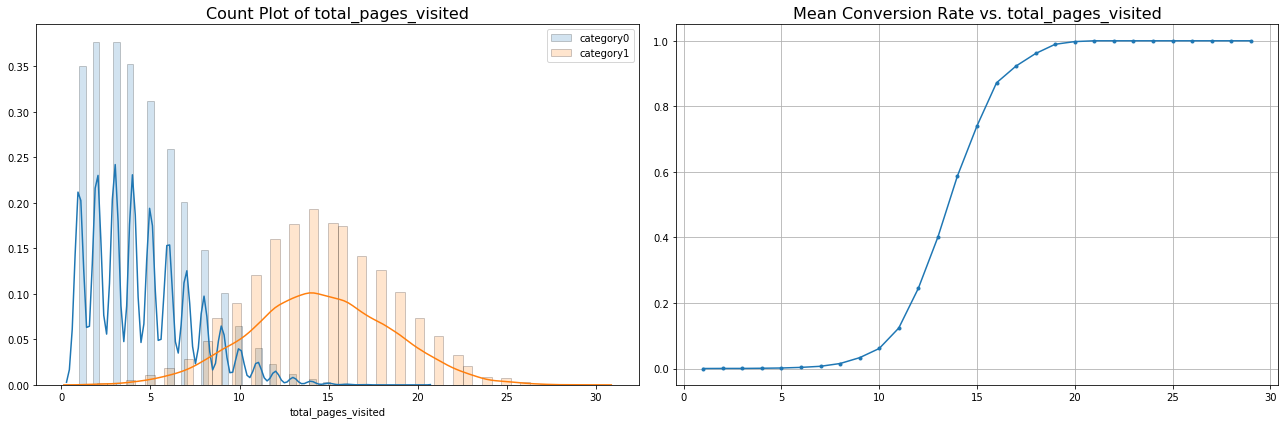

In [24]:
fig, ax=plt.subplots(nrows=1, ncols=2, figsize=(18, 6)) #set the picture frames
hist_kws={'histtype': 'bar'#barplot
          , 'edgecolor':'black'#the color of outframe
          , 'alpha': 0.2}
sns.distplot(data[data.converted==0].total_pages_visited, hist_kws=hist_kws,ax=ax[0], label='category0')
sns.distplot(data[data.converted==1].total_pages_visited, hist_kws=hist_kws,ax=ax[0], label='category1')
ax[0].set_title('Count Plot of total_pages_visited', fontsize=16)
ax[0].legend()#show the legend according to label
grouped=data[['total_pages_visited', 'converted']].groupby('total_pages_visited').mean().reset_index()
ax[1].plot(grouped['total_pages_visited'], grouped['converted'], '.-')
ax[1].set_title('Mean Conversion Rate vs. total_pages_visited', fontsize=16)
ax[1].grid(True)#set the lines within the picture
plt.tight_layout()# avoid overlap
plt.show()

**We can see from the pictures that it's highly posibble for a person to stay if the page_views exceeds around 15

# Machine Learning
**After the exploratory analysis, we have a overview about the relationship between each independent variables and dependent variables. Now it's time to apply the machine learning algo.**

In [25]:
data.head()

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0


In [26]:
data.groupby('converted').count()

,country,age,new_user,source,total_pages_visited
converted,,,,,
0,306000,306000,306000,306000,306000
1,10198,10198,10198,10198,10198


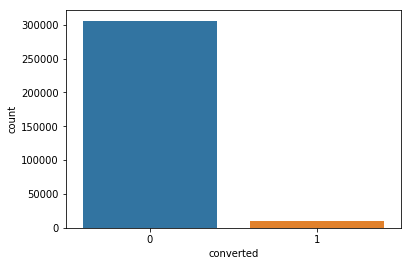

In [27]:
sns.countplot(data.converted)
#Checking the data, we can find out this is a unblanced sample
#Three ways to deal with the problem:
    #use the sample balance method
    #Check the unblance ratio. Pay attention to the model AUC (which is not sensitive to unbalanced data)
    #Use model that is robust to unblanced data

In [28]:

data['country']=data['country'].astype('category')
data['source']=data['source'].astype('category')

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 316198 entries, 0 to 316199
Data columns (total 6 columns):
country                316198 non-null category
age                    316198 non-null int64
new_user               316198 non-null int64
source                 316198 non-null category
total_pages_visited    316198 non-null int64
converted              316198 non-null int64
dtypes: category(2), int64(4)
memory usage: 22.7 MB


In [30]:
y=data['converted']
X=data[['country', 'age','new_user', 'source', 'total_pages_visited' ]]
X=pd.get_dummies(X)

In [31]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2,random_state=42)

In [32]:
y_test.mean(), y_train.mean()
#similar mean, no bias created

(0.03217900063251107, 0.032270179239241296)

# Classification Using Logistic Regression

In [33]:
logreg=LogisticRegression()
logreg.fit(X_train, y_train)

/Users/pg/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [34]:
y_pred=logreg.predict(X_test)

In [35]:
confusion_matrix=confusion_matrix(y_test, y_pred)


In [36]:
print(confusion_matrix)

[[60984   221]
 [  631  1404]]


In [37]:
print(classification_report(y_test, y_pred))
#look not bad, but ROC is a better metric here

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     61205
           1       0.86      0.69      0.77      2035

   micro avg       0.99      0.99      0.99     63240
   macro avg       0.93      0.84      0.88     63240
weighted avg       0.99      0.99      0.99     63240



In [38]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [73]:
logit_roc_auc=round(roc_auc_score(y_test, logreg.predict(X_test)), 4)

In [40]:
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
ROC=pd.DataFrame({'thresholds': thresholds, 'tpr':tpr, 'fpr':fpr  })
ROC=ROC[ROC['thresholds']<1]
ROC['j']=ROC['tpr']-ROC['fpr']

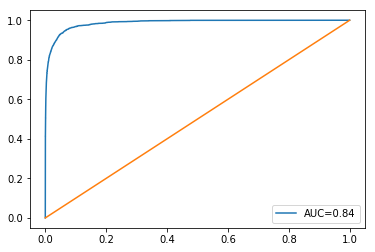

In [41]:
plt.plot(ROC.fpr, ROC.tpr, label='AUC='+str(logit_roc_auc))
plt.plot([1,0],[1,0])
#plot.plot([x2,x1],[y2,y1])
plt.legend()
plt.show()


In [42]:
#How to choose the cut-off point?
#Youden's J statistic is a way
#J=sensitivity+speciality-1
    #=TPR+(1-FPR)-1=TPR-FPR

In [44]:
ROC[ROC['j']==ROC['j'].max()]
#so when whresholds=0.025 the j has it's max so we shoose 0.0236

,thresholds,tpr,fpr,j
1828,0.0236,0.951843,0.068753,0.88309


In [45]:

my_prob=logreg.predict_proba(X_test)[:,1]
my_predict=np.where(my_prob > 0.0236, 1, 0)

In [46]:
my_predict

array([0, 0, 0, ..., 0, 0, 0])

In [47]:
print(classification_report(y_test, my_predict))
#macro average considers more about the minor sample(which is the conversion here)
#it depends on the business senior
#model evaluation needs more practice

              precision    recall  f1-score   support

           0       1.00      0.93      0.96     61205
           1       0.32      0.95      0.47      2035

   micro avg       0.93      0.93      0.93     63240
   macro avg       0.66      0.94      0.72     63240
weighted avg       0.98      0.93      0.95     63240



# Let's see what are the important features

In [48]:
feat_importances = pd.DataFrame({"name":X_train.columns,"coef":logreg.coef_[0]})
feat_importances = feat_importances[['name','coef']]
feat_importances['importances'] = np.abs( feat_importances['coef'] )
feat_importances.sort_values(by="importances",inplace=True,ascending=False)
feat_importances
#ho


,name,coef,importances
3,country_China,-3.768744,3.768744
1,new_user,-1.738165,1.738165
8,source_Direct,-1.716049,1.716049
7,source_Ads,-1.559354,1.559354
9,source_Seo,-1.558443,1.558443
2,total_pages_visited,0.756209,0.756209
6,country_US,-0.674229,0.674229
5,country_UK,-0.292021,0.292021
4,country_Germany,-0.098851,0.098851
0,age,-0.075183,0.075183


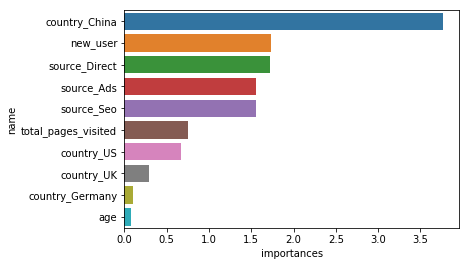

In [49]:
sns.barplot(x='importances', y='name', data=feat_importances)

# Try RandomForest Tomorrow

In [50]:
from sklearn.ensemble import RandomForestClassifier

In [55]:
modelRT=RandomForestClassifier(n_estimators=100, bootstrap=True, max_features='sqrt', random_state=42)
modelRT.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [56]:
predictionRT=modelRT.predict(X_test)

In [58]:
print(classification_report(y_test, predictionRT))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     61205
           1       0.82      0.68      0.75      2035

   micro avg       0.99      0.99      0.99     63240
   macro avg       0.91      0.84      0.87     63240
weighted avg       0.98      0.99      0.98     63240



In [59]:
fprRT, tprRT, thresholdsRT = roc_curve(y_test, modelRT.predict_proba(X_test)[:,1])

In [60]:
ROCRT=pd.DataFrame({'thresholds': thresholdsRT, 'tpr':tprRT, 'fpr':fprRT  })
ROCRT=ROCRT[ROCRT['thresholds']<1]
ROCRT['j']=ROCRT['tpr']-ROCRT['fpr']

In [68]:
ROCRT.head()

,thresholds,tpr,fpr,j
2,0.999167,0.332678,0.000539,0.332139
3,0.998889,0.334152,0.000539,0.333613
4,0.998571,0.335135,0.000539,0.334596
5,0.998333,0.336609,0.000539,0.336070
6,0.998000,0.338575,0.000539,0.338036


In [72]:
RT_roc_auc=round(roc_auc_score(y_test, modelRT.predict(X_test)), 4)

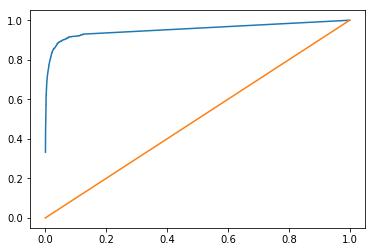

In [65]:
plt.plot(ROCRT.fpr, ROCRT.tpr)
plt.plot([0,1], [0,1])

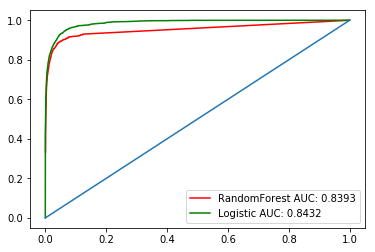

In [75]:
#let's compare two model
plt.plot(ROCRT.fpr, ROCRT.tpr, color='red', label='RandomForest AUC: '+str(RT_roc_auc))
plt.plot(ROC.fpr, ROC.tpr, color='green', label='Logistic AUC: '+str(logit_roc_auc))
plt.plot([0,1], [0,1])
plt.legend()
plt.show()

In [98]:
modelRT.feature_importances_

array([0.1099154 , 0.03857769, 0.80996915, 0.02248582, 0.00260581,
       0.00425821, 0.00417571, 0.00269503, 0.00252593, 0.00279126])

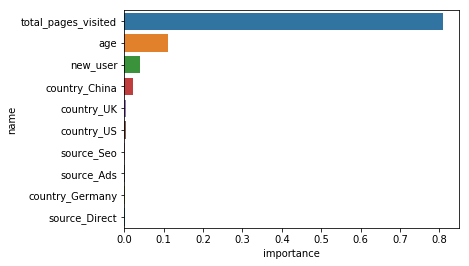

In [88]:
RT_importance=pd.DataFrame({'name': X_train.columns, 'importance': modelRT.feature_importances_})
RT_importance.sort_values(by='importance', ascending=False, inplace=True)
sns.barplot(y='name', x='importance', data=RT_importance)

# Model Campare and Conclusion

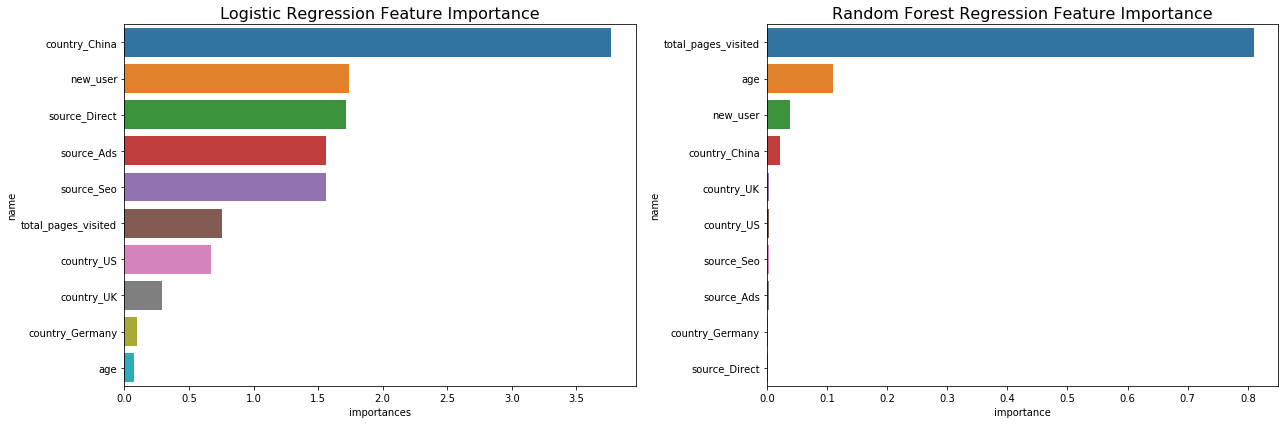

In [97]:
fig, ax=plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
sns.barplot(x='importances', y='name', data=feat_importances, ax=ax[0])
sns.barplot(y='name', x='importance', data=RT_importance, ax=ax[1])
ax[0].set_title('Logistic Regression Feature Importance', size=16)
ax[1].set_title('Random Forest Regression Feature Importance', size=16)
plt.tight_layout()
plt.show()

**Although the Logistic Regression have a better, I don't think the important features here make a lot of sense considering the expoloratary I've done in the first part.**

**The Random Forest model also has a rather high AUC, and the feature makes a lot more sense. (Actually feature importance makes more sense in RF model.**

**Accordingly, my suggestion is to focus on bring up the pages_visit as the more people visit, the more likely they are to convert. Age plays also an important role here. But wether to put more effort or abandon people age specific ages needs more information and research to decide**

# Takeaways from This Project

**Understand the ROC and AUC better: ROC is robust under unblanced sample. ROC can be used to select threshold**

**Threshold selection is complex. It should be selected based on cost/benefit of TP, FP instances. There are many ways to select apart from what's mentioned in the last sentence, including Youden's J statistic**

**My ability of applying model and evaluatin model needs to be improved.**